In [3]:
# Importing the necessary packages
!pip3 install cvxopt

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn
from cvxopt import solvers, matrix
import seaborn as sns

     |████████████████████████████████| 3.1 MB 3.8 MB/s eta 0:00:01


Question 1: (10 points) For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question.

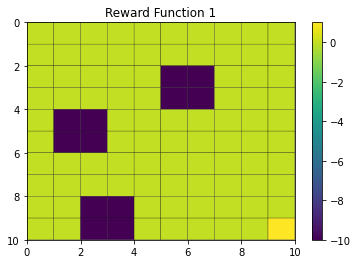

In [40]:
# Reward function 1
reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],
          [0,-10,-10,0,0,0,0,0,0,0],
          [0,-10,-10,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,1]])

# Visualizing the reward
plt.pcolor(reward_fnx1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.show()

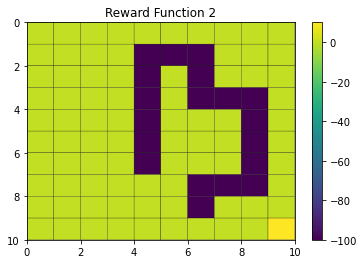

In [4]:
# Reward function 2
reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

# Visualizing the reward
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.show()

Question 2: (40 points) Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:  
• Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)  
• Number of actions = 4 (set of possible actions is displayed in figure 2)  
• w = 0.1  
• Discount factor = 0.8  
• Reward function 1  
After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this part of question, you should have 1 plot.
Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?

In [15]:
k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1

# probabiliy transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right

p_up, p_down, p_left, p_right = state_transition_probabilities(0.1)

In [16]:
def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state


def value_iteration_with_intervals(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon,optimal_steps=32):
    current_state=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (reward_fnx.T).ravel()
    intervals = np.round(np.linspace(1,optimal_steps-1,5))
    steps = 0
    while(delta>epsilon):
        if steps in intervals:
            current_state_ = np.copy(current_state)
            current_state_ = np.transpose(current_state_.reshape(10,10))
            snapshot.append(current_state_) 
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    return snapshot

In [41]:
# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 22


Text(0.5, 1.0, 'Optimal state values for Reward function 1(After Iterations = 22)')

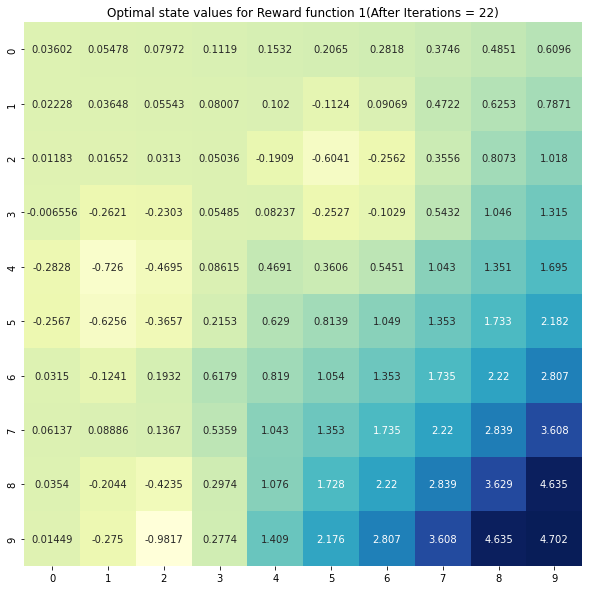

In [43]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1(After Iterations = 22)")

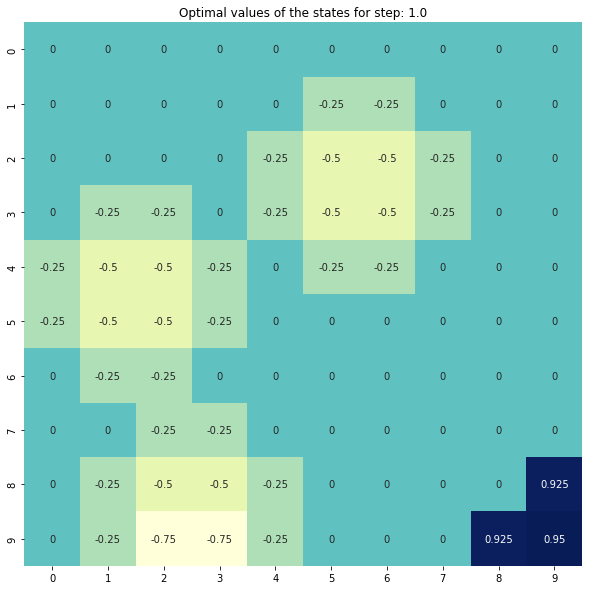

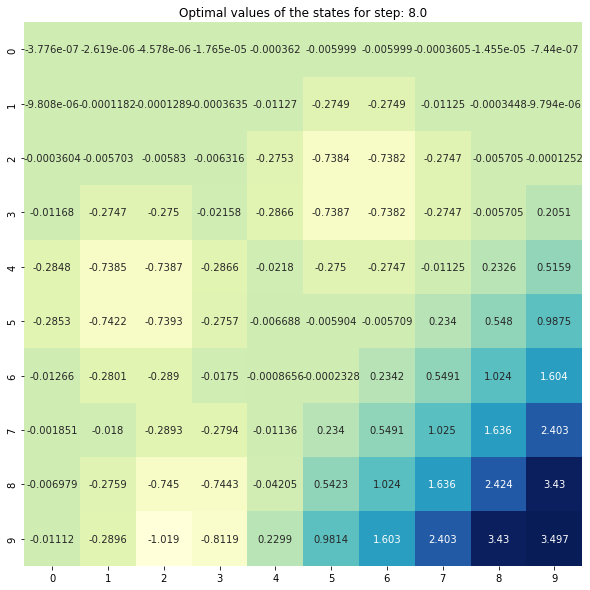

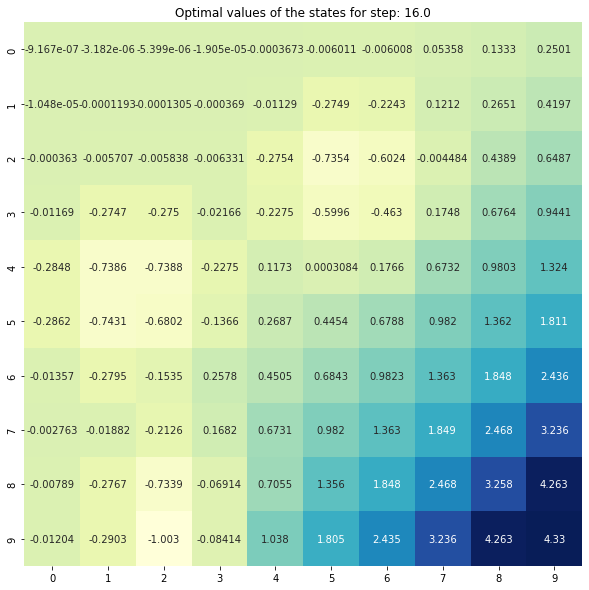

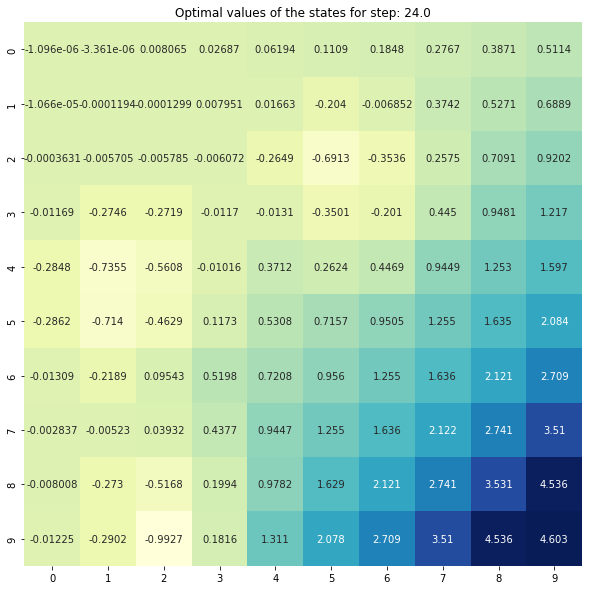

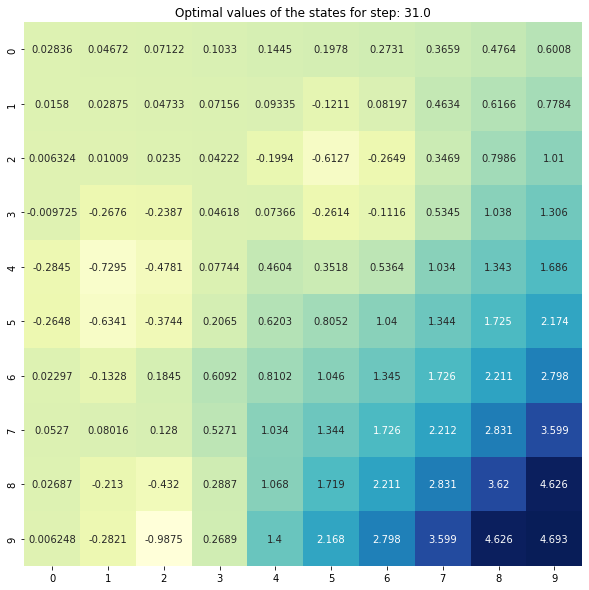

In [44]:
# Snapshots of the state-value until convergence
snapshots = value_iteration_with_intervals(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=22)

intervals = np.round(np.linspace(1, 31, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

For observations of the above plots, it looks like as the iterations increase, there is more of a gradient effect from the top left to the bottom right where the squares in the middle increase in value, with the squares closer to the bottom right increasing more in value.

Question 3: (5 points) Generate a heat map of the optimal state values across the 2-D grid. For generat- ing the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

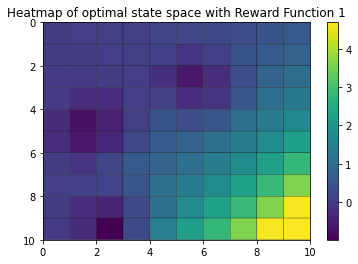

In [45]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 1")
plt.show()

Question 4: (15 points) Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

As the optimal state values get closer to the highest reward value in the bottom right, they increase. This indicates that the best state is nearest this highest reward value. If you are in the top left, there's little value in being in this state, while if you are in the bottom right, there is great value in staying put.

Question 5: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it’s neighboring states? In this question, you should have 1 plot.

In [27]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

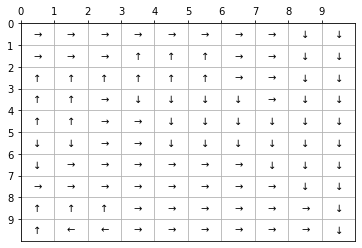

In [46]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

The optimal policy does match intuition. As can be seen for the upper left corners of all of the regions where the reward function is -10, the best policy for the agent is to go up to be out of those regions. The agent is avoiding going over the other squares of these regions that would reduce its reward. Also, if you follow a path from a given square, the path goes to the highest reward value of 10 in the bottom right.

Question 6: (10 points) Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [47]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 32


Text(0.5, 1.0, 'Optimal state values for Reward function 2(After Iterations = 32)')

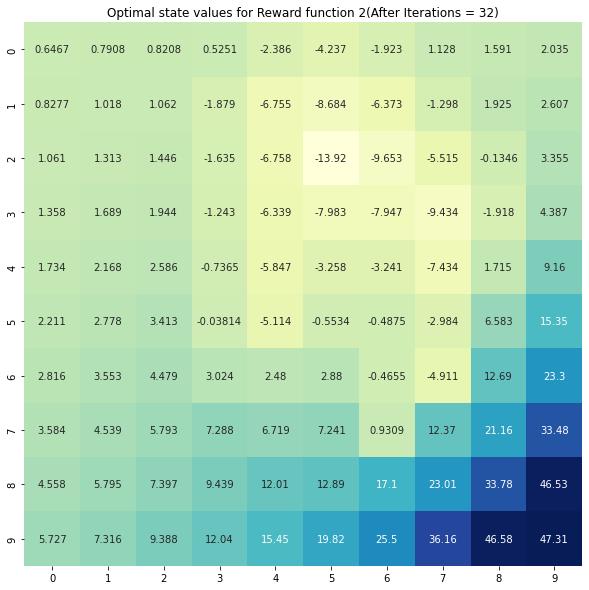

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 2(After Iterations = 32)")

Question 7: (20 points) Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier. Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in this question to explain)

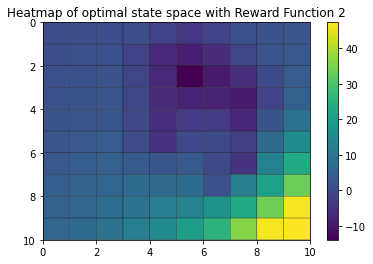

In [49]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

The distribution of the optimal state values look to correspond pretty well to the reward function. The square surrounded by -10 for the reward function has the least optimal state value. Also, the squares closest to the -10 reward values are closer to the least value. The squares closest to the highest reward value of 10 at the bottom right have the highest optimal state values as well.

Question 8: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

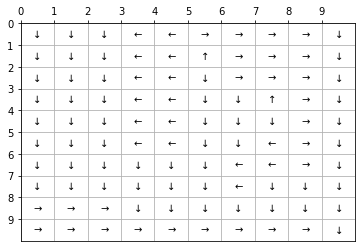

In [50]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Similar to the plot for reward function 1, here all of the paths for all of the squares make their way to the highest reward function value at the bottom right. Also, similar to the plot for reward function 1, the policy for the agent minimizes the number of squares traversed where the reward function is set to -10. For example, if the agent starts at the square with the least optimal state value in the heatmap, then it goes all the way down before going to the right for the highest reward square so that it doesn't go over an -10 reward values.

Question 9:(20 points) Change the hyper parameter w to 0.6 and find the optimal policy map simi- lar to previous question for reward functions. Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the w that you think give rise to better optimal policy and use that w for the next stages of the project.

In [51]:
w=0.6

In [52]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 19


Text(0.5, 1.0, 'Optimal state values for Reward function 1(After Iterations = 19)')

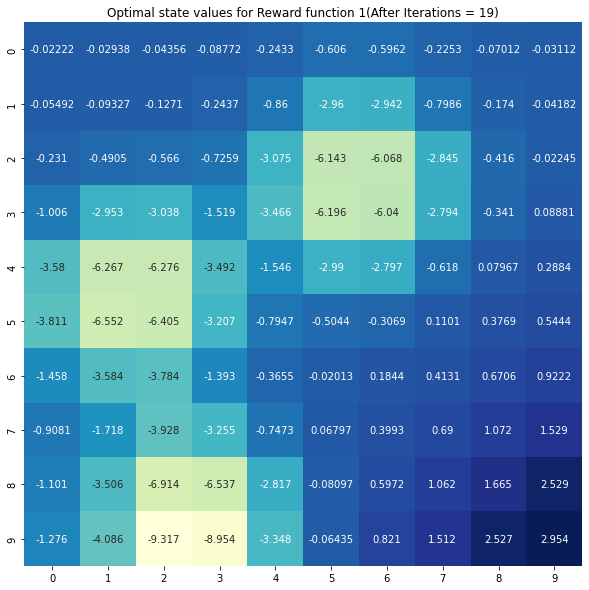

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1(After Iterations = 19)")

In [54]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 27


Text(0.5, 1.0, 'Optimal state values for Reward function 1(After Iterations = 27)')

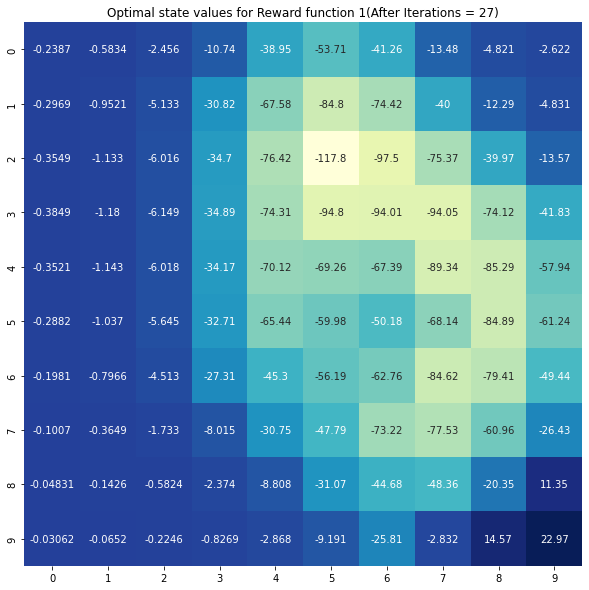

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1(After Iterations = 27)")

A notable difference when w is changed in this way is that the regions in the reward function are more pronounced in the optimal state graph for both reward functions. This looks to correspond to the optimal state taking better account of the reward vs. non-reward steps to take. Hence, this value of w looks to be a better choice than the previous value.

Helper functions for Part 4: IRL

In [56]:
# Computing the optimal policy and not plot it
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): 
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows


# Prepare the matrices for the LP solver
def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

# Computing the accuracy
def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc

Question 10: (10 points) Express c, x, D, b in terms of $R$, $P_a$, $P_{a1}$ , $t_i$, $u$, $λ$ and $R_{max}$

$C = \begin{bmatrix}0 & \mathbb{1} & -\lambda\mathbb{1} & 0 \end{bmatrix}$  
$X = \begin{bmatrix} R & T & U \end{bmatrix}$  
$D = \begin{bmatrix} -(P_{a_1} - P_a)(I - \gamma P_{a_1})^{-1} & I & 0 \\
-(P_{a_1} - P_a)(I - \gamma P_{a_1})^{-1} & 0 & 0 \\
-I & 0 & -I \\
I & 0 & -I \\
-I & 0 & 0 \\
I & 0 & 0\end{bmatrix}$  
$b = \begin{bmatrix} 0 & 0 & 0 & 0 & R_{max} & -R_{max}\end{bmatrix}$

Question 11: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot

In [103]:
w = 0.6
gamma = 0.8
epsilon = 0.01

k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right]

policy1, arrows1 = find_policy_irl(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
policy2, arrows2 = find_policy_irl(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

Policy from Question 5:

In [108]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
accuracy_list = []
for i, lam in enumerate(lambdas_list):
    c, D, b = make_D_matrix(o_e, p, 0, gamma, lam, maximum)
    solvers.options['show_progress'] = False
    irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
    R_pred = np.array(irl_solve['x'][:100])
    _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

    #Solve for accuracy
    best_acc = np.sum(arrows1 == policy_pred)/policy_pred.size
    accuracy_list.append(best_acc)

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

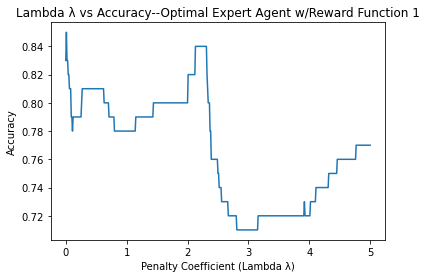

In [109]:
plt.plot(lambdas_list, accuracy_list)
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

Question 12: (5 points) Use the plot in question 11 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}^{(1)}$. Please report $λ_{max}^{(1)}$

In [91]:
max_acc = np.array(accuracy_list).max()
print('maximum accuracy: ' + str(max_acc))
for i, acc in enumerate(accuracy_list):
    if acc == max_acc:
        print('lambda with maximum accuracy: ' + str(lambdas_list[i]))

maximum accuracy: 0.85
lambda with maximum accuracy: 0.01


From the above, $\lambda_{max}^{(1)} = 0.01$

Question 13: (15 points) For $λ_{max}^{(1)}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the λ parameter set to $λ_{max}^{(1)}$. In this question, you should have 2 plots.

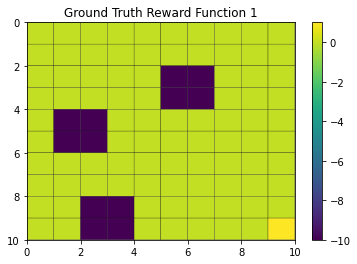

In [72]:
plt.pcolor(reward_fnx1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Ground Truth Reward Function 1")
plt.show()

In [74]:
lambda_max_1 = 0.01
c, D, b = make_D_matrix(o_e, p, 0, gamma, lambda_max_1, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

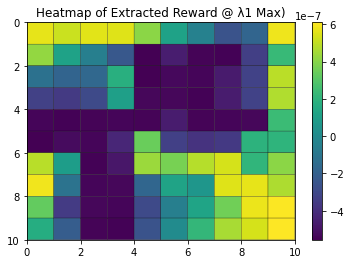

In [110]:
plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ1 Max)")
plt.show()

Question 14: (10 points) Use the extracted reward function computed in question 13, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 3). In this question, you should have 1 plot.

In [80]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

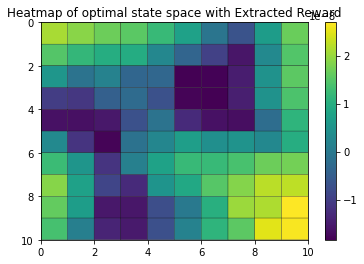

In [82]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Extracted Reward")
plt.show()

Question 15: (10 points) Compare the heat maps of Question 3 and Question 14 and provide a brief explanation on their similarities and differences.

The low reward regions are more pronounced for the plot in Question 14 than for the plot in Question 3. For Question 14, there are more regions where the optimal state has values that are greater than 0 around all the borders. For Question 3, there is more of a gradient of increasing values going towards the bottom right.

Question 16: (10 points) Use the extracted reward function found in question 13 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 5. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

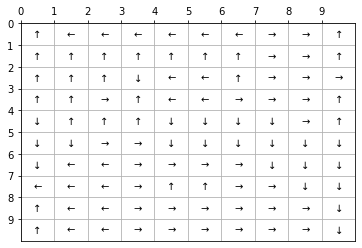

In [83]:
policy = find_policy(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Question 17: (10 points) Compare the figures of Question 5 and Question 16 and provide a brief explanation on their similarities and differences.

There are more arrows on the edge that go point off of the grid in Question 16. Also, there are spaces where the arrows point at each other meaning that the agent would go back and forth betweent the two in Question 16. In contrast, for Question 5, all of the paths go to the bottom right. Many of the paths do go to the bottom right for Question 16 though.

Question 18: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question 8 to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [111]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
accuracy_list = []
for i, lam in enumerate(lambdas_list):
    c, D, b = make_D_matrix(o_e, p, 1, gamma, lam, maximum)
    solvers.options['show_progress'] = False
    irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
    R_pred = np.array(irl_solve['x'][:100])
    _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

    #Solve for accuracy
    best_acc = np.sum(arrows1 == policy_pred)/policy_pred.size
    accuracy_list.append(best_acc)

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

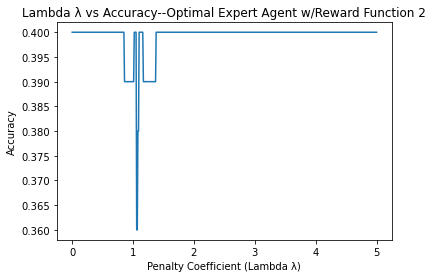

In [112]:
plt.plot(lambdas_list, accuracy_list)
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

Question 19: (5 points) Use the plot in question 18 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}^{(2)}$. Please report $λ_{max}^{(2)}$

In [106]:
max_acc = np.array(accuracy_list).max()
print('maximum accuracy: ' + str(max_acc))
for i, acc in enumerate(accuracy_list):
    if acc == max_acc:
        print('lambda with maximum accuracy: ' + str(lambdas_list[i]))

maximum accuracy: 0.4
lambda with maximum accuracy: 0.0
lambda with maximum accuracy: 0.01
lambda with maximum accuracy: 0.02
lambda with maximum accuracy: 0.03
lambda with maximum accuracy: 0.04
lambda with maximum accuracy: 0.05
lambda with maximum accuracy: 0.06
lambda with maximum accuracy: 0.07
lambda with maximum accuracy: 0.08
lambda with maximum accuracy: 0.09
lambda with maximum accuracy: 0.1
lambda with maximum accuracy: 0.11
lambda with maximum accuracy: 0.12
lambda with maximum accuracy: 0.13
lambda with maximum accuracy: 0.14
lambda with maximum accuracy: 0.15
lambda with maximum accuracy: 0.16
lambda with maximum accuracy: 0.17
lambda with maximum accuracy: 0.18
lambda with maximum accuracy: 0.19
lambda with maximum accuracy: 0.2
lambda with maximum accuracy: 0.21
lambda with maximum accuracy: 0.22
lambda with maximum accuracy: 0.23
lambda with maximum accuracy: 0.24
lambda with maximum accuracy: 0.25
lambda with maximum accuracy: 0.26
lambda with maximum accuracy: 0.27
l

Since there's a range of lambda values that are at the maximum, the one chosen for $λ_{max}^{(2)}$ will be 2.0

Question 20: (15 points) For $λ_{max}^{(2)}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is computed by solving the linear program given by equation 2 with the λ parameter set to $λ_{max}^{(2)}$. In this question, you should have 2 plots.

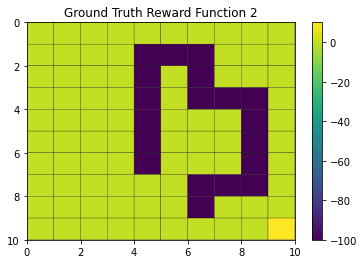

In [94]:
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Ground Truth Reward Function 2")
plt.show()

In [113]:
lambda_max_2 = 1.5
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max_2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

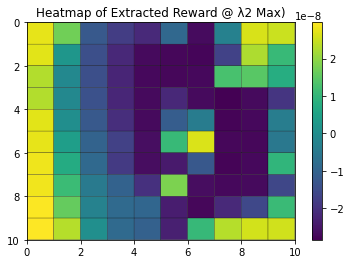

In [114]:
plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

Question 21: (10 points) Use the extracted reward function computed in question 20, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 7). In this question, you should have 1 plot.

In [116]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

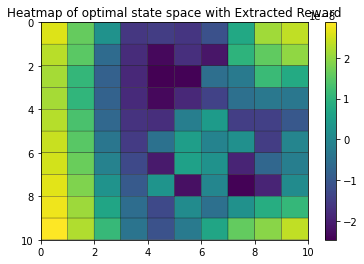

In [117]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Extracted Reward")
plt.show()

Question 22: (10 points) Compare the heat maps of Question 7 and Question 21 and provide a brief explanation on their similarities and differences.

Both plots have darker regions where there the reward function has negative values. The plot for Question 7 more closely corresponds to the reward function negative values. The plot in Question 7 has a gradient effect where the highest values are only found in the bottom right while all of the other edges are lower values. For Question 21, all of the corners have higher values than the regions closer to the negative reward function values.

Question 23: (10 points) Use the extracted reward function found in question 20 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 9. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

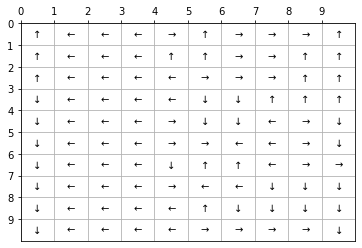

In [118]:
policy = find_policy(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Question 24: (10 points) Compare the figures of Question 9 and Question 23 and provide a brief explanation on their similarities and differences.

One notable similarity is that both plots have the arrows moving away from the regions where the negative reward function values are in the center. One major difference is that there are many values that go off the edge of the grid in Question 23. For Question 8/9, the arrows all go to the bottom right and only there does the arrow go off the grid. Lastly, for Question 23, there are arrows that point at each other. For Question 8/9, the arrows all lead to the bottom right.